# Проверка работы модели триггера на экспериментальных данных 2013 года.

Ко всем кадрам, зарегистрированным в эксперименте 2013 года, применена процедура определения того факта, будет ли данное событие зарегистрировано установкой. Для каждого кадра определяется время срабатывания триггера, исходя из значения порогов, выставленных в эксперименте установкой на момент регистрации данного события. 

Под триггером L3 понимается одновременное превышение порога в находящихся рядом трех ФЭУ. Под триггером G5 - превышение порога в любых пяти ФЭУ мозаики. 

Превышением считается значение сигнала сторого больше значения порога. Превышение считается одновременным, если произошло в течение 40 временных бинов (40 * 25 нс = 1000 нс). 

Проверка проведена на необработанных расшифрованных экспериментальных данных. Выравнивание каналов по светодиодному импульсу не проведено. Значения амплитуд сигналов и порогов - целые числа.

Итог можно сразу прочитать внизу страницы.

#### Чтение данных моделирования триггерного бита

In [1]:
!date
!pwd

Втр Янв 10 12:55:55 MSK 2017
/home/sphere/github/Sphere/CheckTrigger


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#from tqdm import tqdm
import math as mt
import numpy as np

In [3]:
# чтение данных обработки экспериментальных событий триггером
datum = pd.read_csv('log_above_t50.txt', index_col=0, sep='\s+')
# количество событий
len(datum)

3813

In [4]:
# начало списка данных
datum[:2]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10676,1,1,201,239,1,3


Значения параметров:

    FlagL3 - сработало ли триггерное условие L3: 0 - нет, 1 - да,
    FlagG5 - сработало ли триггерное условие G5,
    TL3 - время срабатывания триггерного условия L3,
    TG5 - время срабатывания триггерного условия G5,
    TriggerFlag - выработался ли вообще триггер на регистрацию
    TT - условие, по которому выработался триггер. Т.е. какое из условий L3 и G5 наступило раньше.

### Распределение по TL3 и TG5

Рассмотрены все 3813 кадров, зарегистрированные в 2013 г.

In [5]:
print('TriggerFlag:', len(datum[:][datum['TriggerFlag']== 1]))
print('FlagL3:     ', len(datum[:][datum['FlagL3']     == 1]))
print('FlagG5:     ', len(datum[:][datum['FlagL3']     == 1]))

TriggerFlag: 3813
FlagL3:      3813
FlagG5:      3813


In [6]:
AllTrig_l3 = datum['TL3'][datum['TT']==3]
print('TL3 = ',len(AllTrig_l3))
AllTrig_g5 = datum['TG5'][datum['TT']==5]
print('TG5 = ',len(AllTrig_g5))
print(datum['TT'].value_counts());

TL3 =  3113
TG5 =  700
3    3113
5     700
Name: TT, dtype: int64


#### Во всех 3813 событиях в процессе моделирования "выработался" итоговый триггер TriggerFlag, а также триггеры L3 и G5.

Распределение по триггерам L3 и G5 следующее: в 3113 кадрах первым сработал триггер L3, в 700 кадрах --- G5. 

Построим распределение того триггера, который случился раньше и "вызвал" регистрацию события. Он должен быть в районе 200-300 бина. Однако, наблюдаются триггеры, случившиеся ранее этого интервала. Также есть триггеры, сработавшие в конце кадра на калибровочном сигнале.

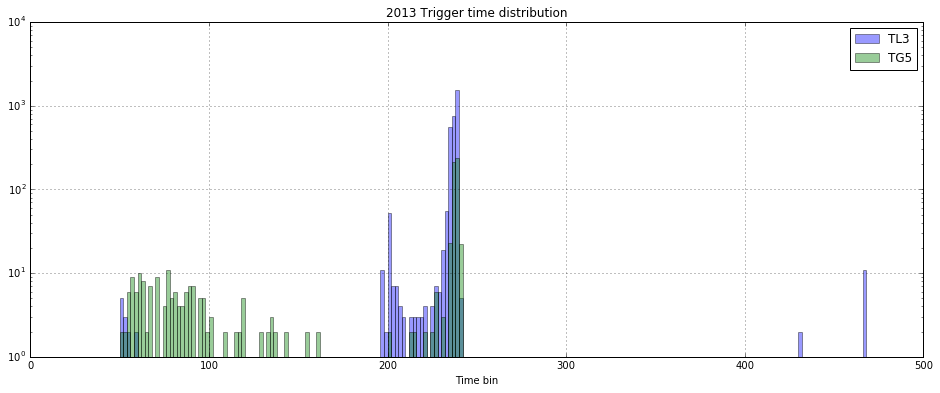

In [7]:
plt.figure(figsize=(16,6))
#plt.hist(datum['TL3'], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
#plt.hist(datum['TG5'], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.hist(AllTrig_l3[:], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(AllTrig_g5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

Посчитаем количество событий с триггерами раньше нужного.

In [8]:
mint = 180
print('TL3 <', mint, ':', len(AllTrig_l3[:][AllTrig_l3 < mint]))
print('TG5 <', mint, ':', len(AllTrig_g5[:][AllTrig_g5 < mint]))

TL3 < 180 : 18
TG5 < 180 : 176


 Раньше нужного триггер L3 "сработал" в 18 из 3113 кадрах (0.6%), а триггер G5 в 176 из 700 кадров (25%).

In [9]:
# Посчитаем количество кадров с поздними триггерами
maxt = 300
print('TL3 >', maxt, ':', len(AllTrig_l3[:][AllTrig_l3 > maxt]))
print('TG5 >', maxt, ':', len(AllTrig_g5[:][AllTrig_g5 > maxt]))

TL3 > 300 : 17
TG5 > 300 : 2


Триггер сработал слишком поздно в 18 событиях: L3: 17 из 3113 (0,5%) и G5 в 2 из 700 (0,3%).

Рассмотрим отдельно триггеры в разных типах событий.

#### Чтение списка калибровочных событий

Список калибровочных кадров получен в процессе классификации событий по алгоритму Тимура.

In [10]:
calibr = pd.read_csv('Calibr.2013.txt', index_col=0, sep=' ')
print('Events =',len(calibr))
calibr[:2]

Events = 3813


,Calibr
Event,
10675,0
10676,1


##  Некалибровочные события

In [11]:
# отбор некалибровочных событий
Events = datum[:][calibr['Calibr']==0]
print('NonCalibration events: ', len(Events))
Events[:3]

NonCalibration events:  1937


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10677,1,1,235,236,1,3
10679,1,1,224,233,1,3


In [12]:
# Распределение по триггерам некалибровочных событий
Trig_l3 = Events['TL3'][Events['TT']==3]
print('lenTL3 = ',len(Trig_l3))
Trig_g5 = Events['TG5'][Events['TT']==5]
print('lenTG5 = ',len(Trig_g5))

lenTL3 =  1314
lenTG5 =  623


Из 1937 некалибровочных событий в 1314 первым сработал триггер L3, в 623 - G5.

In [13]:
print('TL3 <', mint, ':', len(Trig_l3[:][Trig_l3 < mint]))
print('TG5 <', mint, ':', len(Trig_g5[:][Trig_g5 < mint]))

TL3 < 180 : 9
TG5 < 180 : 101


В 110 некалибровочных кадрах триггер сработал до бина 180. 

Раньше нужного триггер L3 "сработал" в 9 из 1314 кадрах (0.7%), а триггер G5 в 101 из 623 кадров (16%).


In [14]:
print('TL3 >', maxt, ':', len(Trig_l3[:][Trig_l3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_g5[:][Trig_g5 > maxt]))

TL3 > 300 : 17
TG5 > 300 : 2


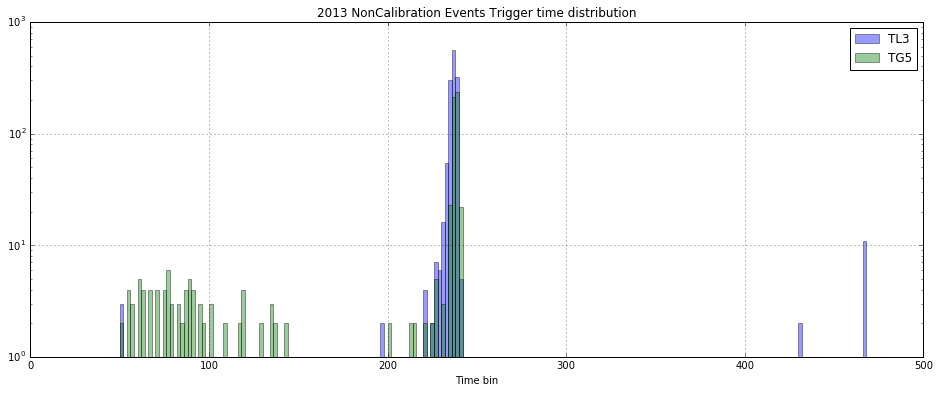

In [15]:
plt.figure(figsize=(16,6))
plt.hist(Events['TL3'][Events['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Events['TG5'][Events['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 NonCalibration Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

#### Кадры с запоздавшими триггерами: 

In [16]:
Trig_l3[:][Trig_l3 > maxt]

Event
10733    467
10831    466
10863    464
10869    439
10953    432
11018    431
11042    430
11168    467
11302    466
11318    467
11452    467
11534    467
11804    467
11910    467
12076    467
13766    467
13818    459
Name: TL3, dtype: int64

In [17]:
Trig_g5[:][Trig_g5 > maxt]

Event
10897    358
10964    416
Name: TG5, dtype: int64

## Калибровочные события

In [18]:
# отбор калибровочных событий
Calibr=datum[:][calibr['Calibr']==1]
print('Calibration events: ', len(Calibr))
Calibr[:3]

Calibration events:  1839


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10676,1,1,201,239,1,3
10678,1,1,200,238,1,3
10682,1,1,201,239,1,3


In [19]:
# распределение по триггерам
Trig_Calibrl3 = Calibr['TL3'][Calibr['TT']==3]
Trig_Calibrg5 = Calibr['TG5'][Calibr['TT']==5]
print('lenTL3 = ',len(Trig_Calibrl3))
print('lenTG5 = ',len(Trig_Calibrg5))
print('TL3 <', mint, ':', len(Trig_Calibrl3[:][Trig_Calibrl3 < mint]))
print('TG5 <', mint, ':', len(Trig_Calibrg5[:][Trig_Calibrg5 < mint]))
print('TL3 >', maxt, ':', len(Trig_Calibrl3[:][Trig_Calibrl3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_Calibrg5[:][Trig_Calibrg5 > maxt]))

lenTL3 =  1794
lenTG5 =  45
TL3 < 180 : 4
TG5 < 180 : 44
TL3 > 300 : 0
TG5 > 300 : 0


В 1794 калибровочных событиях первым сработал триггер L3, в 45 - G5.

В 48 калибровочных кадрах триггер сработал до бина 180.
Раньше нужного триггер L3 "сработал" в 4 из 1794 кадрах (0.2%), а триггер G5 в 44 из 45 кадров (98%). Поздних триггеров нет.

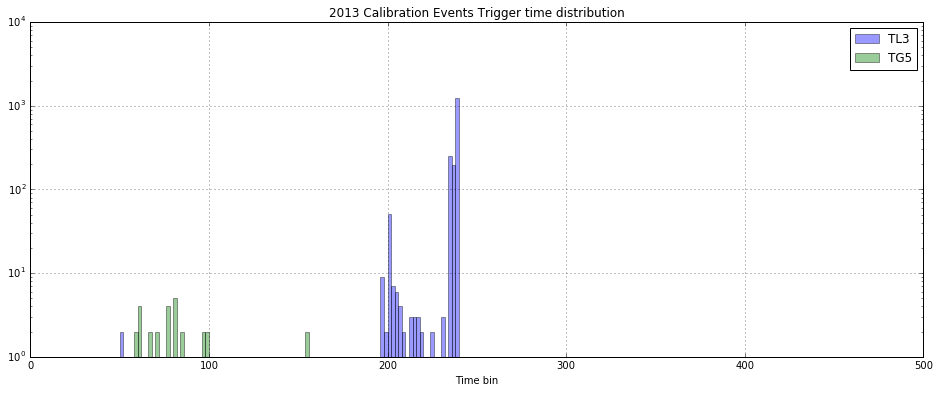

In [36]:
plt.figure(figsize=(16,6))
plt.hist(Trig_Calibrl3[:], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Trig_Calibrg5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Calibration Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

In [37]:
# номера калибровочных событий с малыми временами триггера L3
Trig_Calibrl3[:][Trig_Calibrl3 < mint]
#Trig_Calibrg5[:][Trig_Calibrg5 < mint]

Event
10786    50
10967    55
11007    53
11115    50
Name: TL3, dtype: int64

## Cобытия-кандидаты ШАЛ

#### Чтение списка событий-кандидатов ШАЛ

Используется файл Димы timur2013.txt от 22.09.2016 г с результатом обработки экспериментальных событий по 12 версии. В нём 482 события.

In [21]:
dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep=' ')
eas = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS']=int(1)
eas[:3]

,EAS
Number,
10675,1
10677,1
10685,1


In [23]:
alll=datum.join(eas)
alll[:3]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT,EAS
Event,,,,,,,
10675,1,1,238,238,1,3,1.0
10676,1,1,201,239,1,3,NaN
10677,1,1,235,236,1,3,1.0


In [24]:
# отбор событий EAS из полного списка
EAS = alll[:][alll['EAS']==1]
print('EAS events: ', len(EAS))
EAS[:3]

EAS events:  482


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT,EAS
Event,,,,,,,
10675,1,1,238,238,1,3,1.0
10677,1,1,235,236,1,3,1.0
10685,1,1,205,238,1,3,1.0


#### Анализ триггеров событий ШАЛ

In [25]:
Trig_EASl3 = EAS['TL3'][EAS['TT']==3]
Trig_EASg5 = EAS['TG5'][EAS['TT']==5]
print('EAS events: ', len(EAS))
print('TL3 = ',len(Trig_EASl3))
print('TG5 = ',len(Trig_EASg5))
print('TL3 <', mint, ':', len(Trig_EASl3[:][Trig_EASl3 < mint]))
print('TG5 <', mint, ':', len(Trig_EASg5[:][Trig_EASg5 < mint]))
print('TL3 >', maxt, ':', len(Trig_EASl3[:][Trig_EASl3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_EASg5[:][Trig_EASg5 > maxt]))

EAS events:  482
TL3 =  464
TG5 =  18
TL3 < 180 : 0
TG5 < 180 : 0
TL3 > 300 : 5
TG5 > 300 : 0


В 464 "событиях ШАЛ" первым сработал локальный триггер L3, в 18 глобальный G5.
Ранних триггеров нет.

Но есть 5 поздних триггеров L3. Т.е. 5 событий, в которых триггер вырабатывается только на калибровочном всплеске в конце кадра, а не на момент регистрации события экспериментальным триггером.

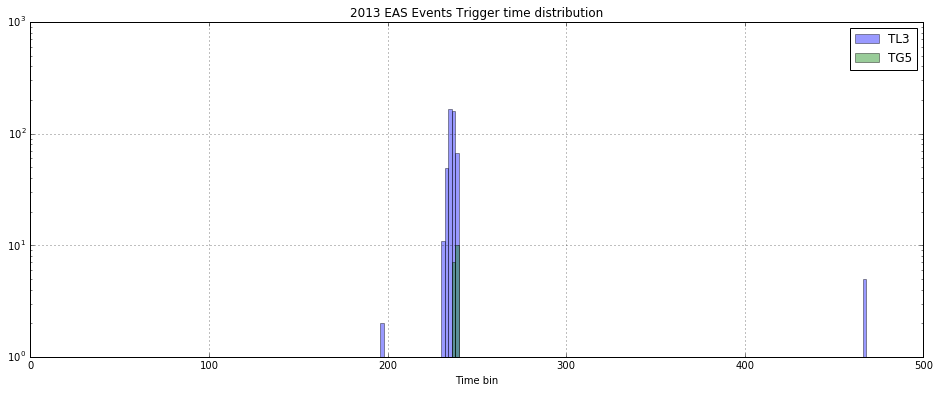

In [27]:
plt.figure(figsize=(16,6))
plt.hist(EAS['TL3'][EAS['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(EAS['TG5'][EAS['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 EAS Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

In [28]:
# номера событий ШАЛ с малыми временами триггера
Trig_EASl3[:][Trig_EASl3 < mint]

Series([], Name: TL3, dtype: int64)

In [30]:
# номера событий ШАЛ с большими временами триггера
Trig_EASl3[:][Trig_EASl3 > maxt]

Event
11168    467
11302    466
11318    467
11452    467
11534    467
Name: TL3, dtype: int64

Из этих поздних безтриггерных событий в утвержденном списке вручную отобранных событий есть только одно событие 11168. Событий 11302, 11318, 11452, 11534 нет в списке.

Таким образом, из событий ШАЛ через модель триггера некорректно проходит один ливень:
11168 - триггер вырабатывается только на калибровочном всплеске.

In [31]:
# все параметры для события 11168
EAS.ix[11168]

FlagL3           1.0
FlagG5           1.0
TL3            467.0
TG5            468.0
TriggerFlag      1.0
TT               3.0
EAS              1.0
Name: 11168, dtype: float64

In [32]:
# все параметры для события 11544
EAS.ix[11544]

FlagL3           1.0
FlagG5           1.0
TL3            235.0
TG5            237.0
TriggerFlag      1.0
TT               3.0
EAS              1.0
Name: 11544, dtype: float64

In [33]:
# все параметры для события 10733
datum.ix[10733]

FlagL3           1
FlagG5           1
TL3            467
TG5            467
TriggerFlag      1
TT               3
Name: 10733, dtype: int64

# Итоги

Модель триггера проверена на экспериментальных данных 2013 г.

В некоторых кадрах в первых бинах имеются шумовые всплески амплитуд из-за особенностей работы каналов оцифровки. Поэтому проверка работы триггера проводилась, начиная с 50-го временного бина из 512.

Во всех 3813 экспериментальных событиях в процессе моделирования "выработался" итоговый триггер TriggerFlag, а также триггеры L3 и G5.
Раньше нужного триггер L3 "сработал" в 18 из 3113 кадров (0,6%), а триггер G5 в 176 из 700 кадров (235%). Триггер сработал слишком поздно в 18 событиях: для L3 в 17 из 3113 (0,5%) и G5 в 2 из 700 (0,3%). Все поздние события - некалибровочные.

Калибровочными считаются 1839 кадров. В 48 из них триггер сработал до бина 180. Раньше нужного триггер L3 "сработал" в 4 из 1794 кадрах (0.2%), а триггер G5 в 44 из 45 кадров (98%).

В 1937 некалибровочных событиях раньше нужного триггер L3 "сработал" в 9 из 1314 кадров (0,7%), а триггер G5 в 101 из 623 кадров (16%). Поздних триггеры в 18 событиях: L3: 17 из 1314 (1,3%) и G5 в 2 из 623 (0,3%).

Из 482 событий, классифицированных как ШАЛ, В 464 кадрах первым сработал триггер L3, в 18 - G5. Раньше нужного триггеры L3 и G5 не срабатывали. Но есть событие 11168, в котором триггер вырабатывается только на калибровочном всплеске.

Результаты представлены в виде таблицы для удобства восприятия.

|Trig| All  | All< 180|All>300|| Calibr | Cal< 180 || NoCal| NC< 180 | NC>300 || EAS | EAS< 180 | EAS>300| 
| :- |----: | -------:| --:   ||----: |    ----:   ||----: |  ----:     | ----:     ||----:|   ----:  | -:|
|L3  | 3113 |  18 (0.6%) | 17|| 1794 |  4 (0.2%) || 1314 |  9 (0.7%) |17 (1.3%) || 464 | 0       | 0 | 
|G5  |  700 | 176 (25%)  |  2||   45 | 44 (98%)  ||  623 |101 (16%)  | 2 (0.3%) ||  18 | 0       | 5 |
|All | 3813 | 184 (4.8%) | 18|| 1839 | 48 (2.6%) || 1937 |110 (5.7%))|19 (1.0%) || 482 | 0       | 5 |

К недостатку данной работы относится обработка событий с невыравненными по светодиодному импульсу каналами. Можно исправить эти недочеты и заново проверить работу триггера. 

##### Можно ли считать такой триггер удовлетворительным? 
Мне кажется, что да.

Как сообщил 04.01.2017 Дима П., в некалибровочном событии 10733 ни триггер L3 ни G5 в эксперименте не выработались. Если проверка это подтвердит (что в эксперименте есть события без триггеров и они совпадут со списком 18 событий с задержкой триггера ), то модель воспроизводит работу триггера.

При анализе работы триггера без отброса первых временных бинов была получена следующая таблица:

\begin{array}{|c|r|r|r|r|r|r|r|r|r|r|}
\hline
Trig & All  & All< 180   & Calibr & Cal< 180 & NoCal & NC< 180 & NC>300 & EAS & EAS < 180 & EAS > 300\\
\hline 
L3  & 3140 &  50  (1.5\%) & 1794 & 7  (0.4\%) & 1339 & 36 (2.7\%) &16 (1.2\%) & 464 & 1(0.2\%) & 0 \\ \hline 
G5  &  673 & 156  (23\%)  &   45 & 44 (98\%)  &  598 & 83 (14\%)  & 2 (0.3\%) &  18 & 0        & 5 \\ \hline 
All & 3813 & 206  (5.4\%) & 1839 & 51 (2.7\%) & 1937 &119 (6.1\%))&18 (0.9\%) & 482 & 1(0.2\%) & 5 \\ 
\hline
\end{array}